<a href="https://colab.research.google.com/github/azmirizkya/Data-Analysis-with-Colab/blob/main/Machine_Failure_Binary_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Business Understanding**

**Background:**

Industri manufaktur dan pemeliharaan mesin terus berkembang dan mengalami perubahan sebagai hasil dari kemajuan teknologi dan perubahan dalam kebutuhan pasar.

**Problem:**

Dalam industri manufaktur dan pemeliharaan mesin, kegagalan mesin dapat memiliki dampak yang signifikan terhadap efisiensi operasional dan biaya perbaikan.

**Analytical Approach:**

Menggunakan machine learning untuk untuk memahami struktur, format, dan kualitas data.
Dalam melakukan prediksi, digunakan jenis biner.

# **2. Data Understanding**

## **2.1 About Dataset**


Sumber dataset: [Predictive Maintenance Dataset (AI4I 2020)](https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020)

No | Variabel | Deskripsi
---|---|---
1 | UID | identifier unik mulai dari 1 hingga 10.000
2 | product ID | varian kualitas produk, nomor seri khusus varian yang terdiri dari Low/L (50% dari semua produk), Medium/M (30%), High/H (20%)
3 | type | tipe produk L, M, H dari product ID
4 | air temperature [K] | suhu udara pada proses manufaktur dalam skala Kelvin (K), dihasilkan menggunakan proses random walk yang kemudian dinormalisasi ke standar deviasi 2 K sekitar 300 K
5 | process temperature [K] | suhu proses manufaktur dalam skala Kelvin [K]
6 | rotational speed [rpm] | kecepatan putaran pada proses manufaktur dalam satuan rpm (rotations per minute), dihitung dari daya 2860 W, dilapisi dengan noise yang terdistribusi secara normal
7 | torque [Nm] | besar torsi (torque) yang dihasilkan pada proses manufaktur dalam satuan Nm (Newton meter), nilai torsi terdistribusi secara normal di sekitar 40 Nm dengan SD = 10 Nm dan tidak ada nilai negatif
8 | tool wear [min] | Varian kualitas H/M/L ditambahkan 5/3/2 menit tool wear pada alat yang digunakan dalam proses
9 | machine failure | variabel target yang menunjukkan apakah mesin mengalami kegagalan pada proses manufaktur atau tidak (1 = gagal,  0 = tidak gagal)

# **3. Data Preparation**

Tahap ini merupakan proses analisis lanjutan dari data understanding untuk memastikan kualitas data yang baik agar data dapat lebih siap untuk digunakan dalam proses pemodelan

## **3.1 Importing Libraries & Dataset**

In [ ]:
#@title Import library python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score

In [ ]:
import os;
os.listdir('/kaggle/input/predictive-maintenance-dataset-ai4i-2020')

['ai4i2020.csv']

In [ ]:
data_1 = pd.read_csv('/kaggle/input/predictive-maintenance-dataset-ai4i-2020/ai4i2020.csv')

Memanggil tabel data

In [ ]:
data_1.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

Menampilkan informasi dataframe

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## **3.2 Describing Dataset**

Menampilkan statistik deskriptif dari data

In [ ]:
data_1.describe(include='all')

UDI Product ID   Type  Air temperature [K]  \
count   10000.00000      10000  10000         10000.000000   
unique          NaN      10000      3                  NaN   
top             NaN     M14860      L                  NaN   
freq            NaN          1   6000                  NaN   
mean     5000.50000        NaN    NaN           300.004930   
std      2886.89568        NaN    NaN             2.000259   
min         1.00000        NaN    NaN           295.300000   
25%      2500.75000        NaN    NaN           298.300000   
50%      5000.50000        NaN    NaN           300.100000   
75%      7500.25000        NaN    NaN           301.500000   
max     10000.00000        NaN    NaN           304.500000   

        Process temperature [K]  Rotational speed [rpm]   Torque [Nm]  \
count              10000.000000            10000.000000  10000.000000   
unique                      NaN                     NaN           NaN   
top                         NaN                     NaN           NaN   
freq                        NaN                     NaN           NaN   
mean                 310.005560             1538.776100     39.986910   
std                    1.483734              179.284096      9.968934   
min                  305.700000             1168.000000      3.800000   
25%                  308.800000             1423.000000     33.200000   
50%                  310.100000             1503.000000     40.100000   
75%                  311.100000             1612.000000     46.800000   
max                  313.800000             2886.000000     76.600000   

        Tool wear [min]  Machine failure           TWF           HDF  \
count      10000.000000     10000.000000  10000.000000  10000.000000   
unique              NaN              NaN           NaN           NaN   
top                 NaN              NaN           NaN           NaN   
freq                NaN              NaN           NaN           NaN   
mean         107.951000         0.033900      0.004600      0.011500   
std           63.654147         0.180981      0.067671      0.106625   
min            0.000000         0.000000      0.000000      0.000000   
25%           53.000000         0.000000      0.000000      0.000000   
50%          108.000000         0.000000      0.000000      0.000000   
75%          162.000000         0.000000      0.000000      0.000000   
max          253.000000         1.000000      1.000000      1.000000   

                 PWF           OSF          RNF  
count   10000.000000  10000.000000  10000.00000  
unique           NaN           NaN          NaN  
top              NaN           NaN          NaN  
freq             NaN           NaN          NaN  
mean        0.009500      0.009800      0.00190  
std         0.097009      0.098514      0.04355  
min         0.000000      0.000000      0.00000  
25%         0.000000      0.000000      0.00000  
50%         0.000000      0.000000      0.00000  
75%         0.000000      0.000000      0.00000  
max         1.000000      1.000000      1.00000

## **3.3 Checking Missing Value**

Memeriksa jumlah data yang hilang dalam dataframe

In [ ]:
data_1.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

***
**Insight**
***
Tidak ditemukan missing value dalam data frame.

## **3.4 Checking Data Duplicate**

Menampilkan jumlah duplicate rows di dataframe

In [ ]:
data_1.duplicated().sum()

0

***
**Insight**
***
Tidak ditemukan duplikat data dalam data frame.

## **3.5 Feature Selection**

### **3.5.1 Checking Correlation**

Memeriksa korelasi antar features dalam dataframe

/tmp/ipykernel_20/2268520159.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_1.corr()


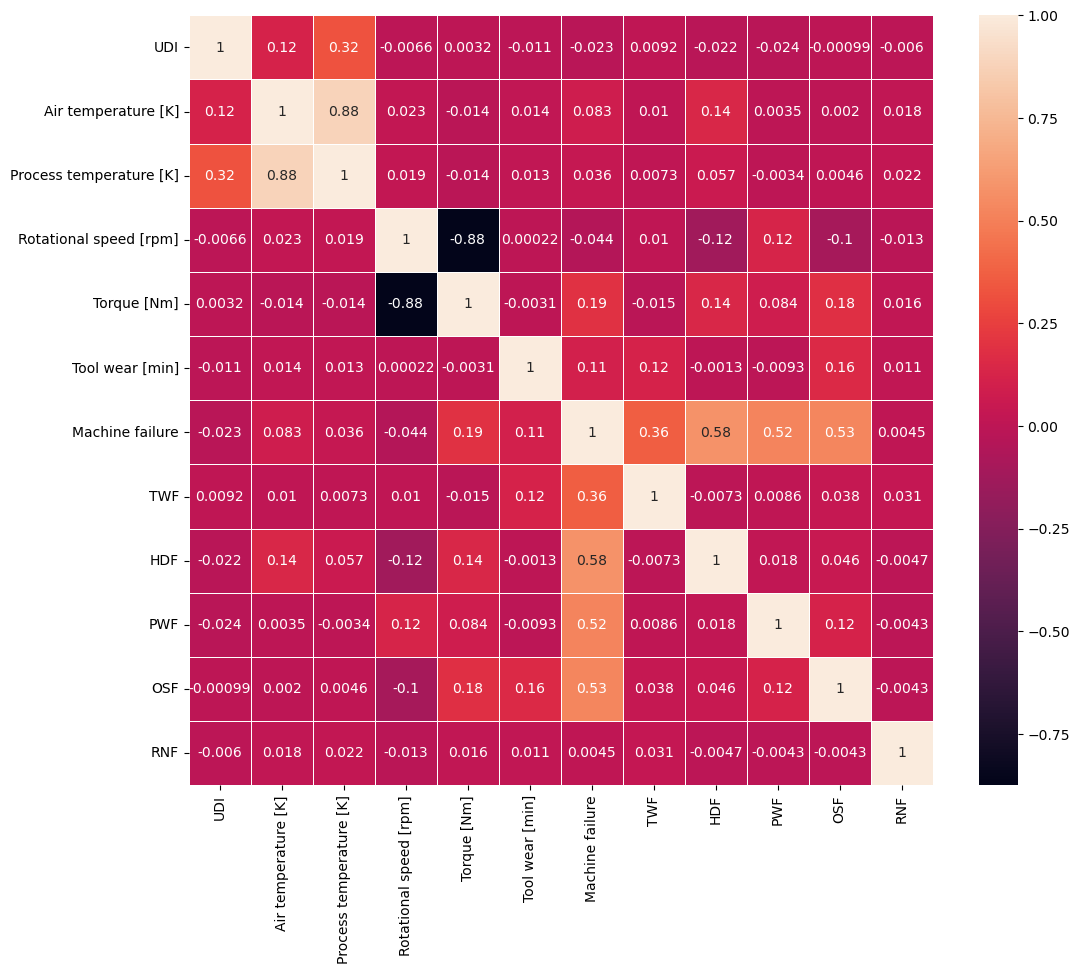

In [ ]:
corr_matrix = data_1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='rocket', annot=True,  linewidths=0.5)
plt.show()

In [ ]:
print(corr_matrix['Machine failure'].sort_values(ascending=False))

Machine failure            1.000000
HDF                        0.575800
OSF                        0.531083
PWF                        0.522812
TWF                        0.362904
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
RNF                        0.004516
UDI                       -0.022892
Rotational speed [rpm]    -0.044188
Name: Machine failure, dtype: float64


***
**Insight**
***
HDF, OSF, PWF memiliki korelasi tertinggi terhadap variabel target ('Machine failure')

### **3.5.2 Dropping the Feature**

Drop fitur yang tidak berkorelasi untuk pemodelan jenis biner

Drop **'Product ID'** dan **'UDI'**

In [ ]:
data_1 = data_1.drop(['Product ID', 'UDI'], axis=1)

Drop variabel mode machine failure, yaitu **'TWF','HDF','PWF','OSF'**, dan **'RNF'** karena pada kasus ini hanya akan dilakukan pemodelan biner.

In [ ]:
data_1 = data_1.drop(['TWF','HDF','PWF','OSF','RNF'], axis=1)

## **3.6 Data Encoding**

Melakukan data encoding untuk variable **'Type'**

In [ ]:
data_1['Type'][data_1['Type']=='L']=1
data_1['Type'][data_1['Type']=='M']=2
data_1['Type'][data_1['Type']=='H']=3

/tmp/ipykernel_20/1190216547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Type'][data_1['Type']=='L']=1
/tmp/ipykernel_20/1190216547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Type'][data_1['Type']=='M']=2
/tmp/ipykernel_20/1190216547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Type'][data_1['Type']=='H']=3


***
**Insight**
***
Kolom 'Type' terkonversi dari L/M/H menjadi variabel 1/2/3. 1 sebagai Low, 2 sebagai Medium, dan 3 sebagai High.

In [ ]:
data_1.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    2                298.1                    308.6                    1551   
1    1                298.2                    308.7                    1408   
2    1                298.1                    308.5                    1498   
3    1                298.2                    308.6                    1433   
4    1                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  
0         42.8                0                0  
1         46.3                3                0  
2         49.4                5                0  
3         39.5                7                0  
4         40.0                9                0

## **3.7 Checking & Handling Data Imbalance**

Memeriksa ketidakseimbangan data

In [ ]:
print(data_1['Machine failure'].value_counts())

0    9661
1     339
Name: Machine failure, dtype: int64


<Axes: title={'center': 'Class distribution before appying SMOTE'}, xlabel='machine failure'>

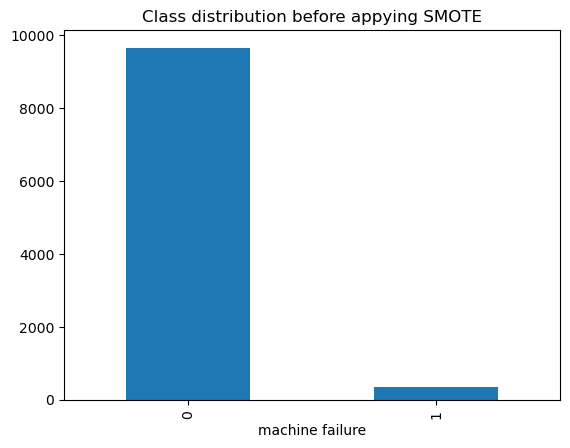

In [ ]:
pd.Series(data_1['Machine failure']).value_counts().plot(kind='bar', title='Class distribution before appying SMOTE', xlabel='machine failure')

***
**Insight**
***
Terdapat ketidakseimbangan kelas dalam dataset. Jumlah data mesin yang tidak mengalami kegagalan (0) jauh lebih banyak daripada jumlah data mesin yang mengalami kegagalan (1). Jumlah data mesin yang mengalami tidak kegagalan, yaitu 9661 dari total 10000 data, sedangkan jumlah data mesin yang mengalami kegagalan, yaitu 339 dari total 10000 data.

Melakukan SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan kelas dalam dataset.

In [ ]:
X = data_1.drop(['Machine failure'], axis=1)
y = data_1['Machine failure']

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [ ]:
print(y.value_counts())

0    9661
1    9661
Name: Machine failure, dtype: int64


<Axes: title={'center': 'Class distribution after appying SMOTE'}, xlabel='machine failure'>

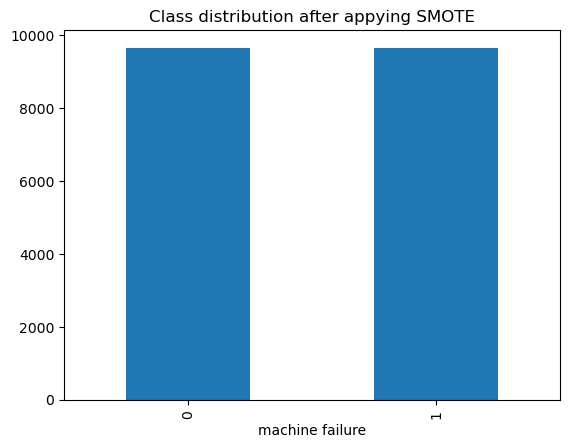

In [ ]:
pd.Series(y).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='machine failure')

***
**Insight**
***
Setelah dilakukan SMOTE, distribusi kelas menjadi seimbang. Jumlah data mesin yang mengalami kerusakan sama dengan jumlah data mesin yang tidak mengalami kerusakan, yaitu 9661.

## **3.8 Feature Engineering**

Mempersiapkan variabel yang optimal untuk dilakukan pemodelan.

'Air temperature [K]' dan 'Process temperature [K]' diubah dari Kelvin ke Celcius, kemudian diubah nama kolomnya menjadi 'Air temperature [°C]' dan 'Process temperature [°C]'. Perubahan ini dilakukan untuk menyesuaikan skala suhu yang digunakan di Indonesia, yaitu Celcius.

In [ ]:
data_1['Air temperature [K]'] = data_1['Air temperature [K]'] - 273.15
data_1 = data_1.rename(columns={'Air temperature [K]': 'Air temperature [°C]'})
data_1['Process temperature [K]'] = data_1['Process temperature [K]'] - 273.15
data_1 = data_1.rename(columns={'Process temperature [K]': 'Process temperature [°C]'})

Membuat variabel baru bernama **'Power'** dari hasil perkalian antara **'Rotational speed [rpm]'** dan **'Torque [Nm]'**.

In [ ]:
data_1['Power']=data_1['Rotational speed [rpm]']*data_1['Torque [Nm]']

Membuat variabel baru bernama **'Temperature difference [°C]'** dari hasil pengurangan antara **'Process temperature [°C]'** dan **'Air temperature [°C]'**.

In [ ]:
data_1['Temperature difference [°C]'] = data_1['Process temperature [°C]']-data_1['Air temperature [°C]']

Membuat variabel baru bernama **'Temperature power [°C]'** dari hasil pembagian antara **'Temperature difference [°C]'** dan **'Power'.**

In [ ]:
data_1['Temperature power [°C]'] = data_1['Temperature difference [°C]']/data_1['Power']

Menata ulang posisi tiap variabel dalam dataframe

In [ ]:
data_1 = data_1[['Air temperature [°C]',
         'Process temperature [°C]',
         'Rotational speed [rpm]',
         'Torque [Nm]',
         'Tool wear [min]',
         'Power',
         'Temperature difference [°C]',
         'Temperature power [°C]',
         'Machine failure',
         'Type'
        ]]

In [ ]:
data_1.head()

Air temperature [°C]  Process temperature [°C]  Rotational speed [rpm]  \
0                 24.95                     35.45                    1551   
1                 25.05                     35.55                    1408   
2                 24.95                     35.35                    1498   
3                 25.05                     35.45                    1433   
4                 25.05                     35.55                    1408   

   Torque [Nm]  Tool wear [min]    Power  Temperature difference [°C]  \
0         42.8                0  66382.8                         10.5   
1         46.3                3  65190.4                         10.5   
2         49.4                5  74001.2                         10.4   
3         39.5                7  56603.5                         10.4   
4         40.0                9  56320.0                         10.5   

   Temperature power [°C]  Machine failure Type  
0                0.000158                0    2  
1                0.000161                0    1  
2                0.000141                0    1  
3                0.000184                0    1  
4                0.000186                0    1

***
**Insight**
***
Penggabungan variabel di atas dilakukan untuk mengoptimalkan kegunaan variabel yang ada dan meningkatkan akurasi model yang akan dibuat. Yang mana didapat 3 variabel baru, yaitu Power, Temperature difference [°C], dan Temperature Power [°C].

## **3.9 Automated EDA**

In [ ]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 28.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.9.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data_1,
                        title="Predictive Maintenance",
                        dataset={"description": "This profiling report was generated for Carl Kirstein",
                                 "copyright_holder": "Carl Kirstein",
                                 "copyright_year": "2022",
                                },
                        explorative=True,
                       )
profile

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_20/1675016906.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **4. Modeling**

Memisahkan variabel independen (kolom lainnya) sebagai X dan variabel dependen (kolom 'Machine failure') sebagai y.

In [ ]:
X = data_1.drop('Machine failure', axis=1)
y = data_1['Machine failure']

Memisahkan dataset menjadi data training dan data testing dengan perbandingan 80:20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

Melakukan scaling pada X

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(8000, 9)
(8000,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(2000, 9)
(2000,)


Model Fitting

Model prediksi yang digunakan adalah model **Decision Tree** dan **Random Forest**.

## **4.1 Decision Tree Model**

In [ ]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
data_1['predictions'] = pd.DataFrame(y_pred_dt)

In [ ]:
data_1 = data_1.dropna(subset=['predictions'])
data_1['predictions'] = data_1['predictions'].astype(int)

/tmp/ipykernel_20/34025161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['predictions'] = data_1['predictions'].astype(int)


In [ ]:
# Decision Tree Classification Report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.67      0.77      0.72        61

    accuracy                           0.98      2000
   macro avg       0.83      0.88      0.85      2000
weighted avg       0.98      0.98      0.98      2000



***
**Insight**
***


*   *Precision*: dari semua mesin yang diprediksi benar positif kegagalannya (Machine failure) oleh model, hanya 76% yang benar-benar benar positif.
*   *Recall*: dari semua mesin yang benar gagal (Machine failure), model memprediksi hasil yang benar untuk 77% dari mesin tersebut.
*   *F1-Score*: nilai F1-Score 76% mengindikasikan bahwa model klasifikasi yang dibuat memiliki precision dan recall yang cukup bagus. Model memprediksi kegagalan mesin (Machine failure) dengan cukup baik.
*   *Support*: di antara mesin dalam dataset uji, 1939 tidak gagal dan 61 benar gagal.
*   *Accuracy*: persentase model membuat prediksi dengan benar yaitu 98%.

In [ ]:
# Decision Tree confusion matrix
print(confusion_matrix(y_test, y_pred_dt))

[[1916   23]
 [  14   47]]


***
**Insight**
***
*   Sebanyak 1923 data positif diprediksi benar/positif (True Positive) artinya 1923 data kegagalan mesin yang positif dan model memprediksi kegagalan mesin tersebut dengan benar. Gagal diprediksi sebagai gagal, tidak gagal/berhasil diprediksi sebagai tidak gagal/berhasil.
*   Sebanyak 47 data negatif diprediksi benar/negatif (True Negatif) artinya 47 data kegagalan mesin yang negatif dan model memprediksi jenis kelamin tersebut dengan benar. Mesin gagal tidak diprediksi sebagai kebalikannya/berhasil, mesin tidak gagal/berhasil tidak diprediksi sebagai kebalikannya/mesin gagal.
*   Sebanyak 16 data negatif diprediksi salah/positif (False Positive) artinya 16 data kegagalan mesin penguin yang negatif dan model memprediksi kegagalan mesin tersebut dengan salah.
*   Sebanyak 14 data positif diprediksi salah/negatif (False Negative) artinya 14 data kegagalan mesin yang positif dan model memprediksi kegagalan mesin tersebut dengan salah.

## **4.2 Random Forest Model**

In [ ]:
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5).fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Random Forest classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.96      0.43      0.59        61

    accuracy                           0.98      2000
   macro avg       0.97      0.71      0.79      2000
weighted avg       0.98      0.98      0.98      2000



***
**Insight**
***


*   *Precision*: dari semua mesin yang diprediksi benar positif kegagalannya (Machine failure) oleh model, ada 96% yang benar-benar benar positif.
*   *Recall*: dari semua mesin yang benar gagal (Machine failure), model memprediksi hasil yang benar untuk 43% dari mesin tersebut.
*   *F1-Score*: nilai F1-Score 59% mengindikasikan bahwa model klasifikasi yang dibuat memiliki precision dan recall yang kurang bagus. Model memprediksi kegagalan mesin (Machine failure) dengan tidak cukup baik.
*   *Support*: di antara mesin dalam dataset uji, 1939 tidak gagal dan 61 benar gagal.
*   *Accuracy*: persentase model membuat prediksi dengan benar yaitu 98%.

In [ ]:
# Random Forest confusion matrix
print(confusion_matrix(y_test, y_pred_rf))

[[1938    1]
 [  35   26]]


***
**Insight**
***
*   Sebanyak 1938 data positif diprediksi benar/positif (True Positive) artinya 1938 data kegagalan mesin yang positif dan model memprediksi kegagalan mesin tersebut dengan benar. Gagal diprediksi sebagai gagal, tidak gagal/berhasil diprediksi sebagai tidak gagal/berhasil.
*   Sebanyak 26 data negatif diprediksi benar/negatif (True Negatif) artinya 26 data kegagalan mesin yang negatif dan model memprediksi jenis kelamin tersebut dengan benar. Mesin gagal tidak diprediksi sebagai kebalikannya/berhasil, mesin tidak gagal/berhasil tidak diprediksi sebagai kebalikannya/mesin gagal.
*   Sebanyak 1 data negatif diprediksi salah/positif (False Positive) artinya 1 data kegagalan mesin penguin yang negatif dan model memprediksi kegagalan mesin tersebut dengan salah.
*   Sebanyak 35 data positif diprediksi salah/negatif (False Negative) artinya 35 data kegagalan mesin yang positif dan model memprediksi kegagalan mesin tersebut dengan salah.

## **4.3 Model Comparison**

In [ ]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred_dt))
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, y_pred_rf))

DecisionTrees's Accuracy:  0.9815
Random Forest's Accuracy:  0.982


Akurasi model Decision Tree lebih besar (0,985) daripada model Random Forest (0,982). Oleh karena itu, model yang menggunakan Decision Tree dipilih untuk dilakukan evaluasi.

# **5.Evaluation**

## **5.1 Decision Tree - Hyperparameter Tuning**

In [ ]:
params = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(dt, param_grid=params, cv=5)
grid_search_dt.fit(X_train, y_train)
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_
print("Best Parameters (Decision Tree):", best_params_dt)
print("Best Score (Decision Tree):", best_score_dt)
y_pred_dt = grid_search_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy (Decision Tree):", accuracy_dt)

Best Parameters (Decision Tree): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score (Decision Tree): 0.9891249999999999
Accuracy (Decision Tree): 0.9895


***
**Insight**
***
Setelah dilakukan hyperparameter tuning, akurasi dari model decision tree bertambah dari 0,985 menjadi 0,989.

## **5.2 Decision Tree - Cross Validation**

In [ ]:
scores = cross_val_score(rf, X, y, cv=10)
print("Accuracy with cross-validation: %.2f with standard deviation %.2f" % (scores.mean(), scores.std()))

Accuracy with cross-validation: 0.93 with standard deviation 0.13


***
**Insight**
***
Setelah dilakukan cross validation, nilai akurasi dari model Decision Tree turun dari 0,98 menjadi 0,93.

## **5.3 ROC Curve**

Menampilkan ROC Score Decision Tree

In [ ]:
roc_score = roc_auc_score(y_test, y_pred_dt)
print("Nilai ROC:" + "%.2f" % roc_score)

Nilai ROC:0.88


Membuat ROC Curve Decision Tree

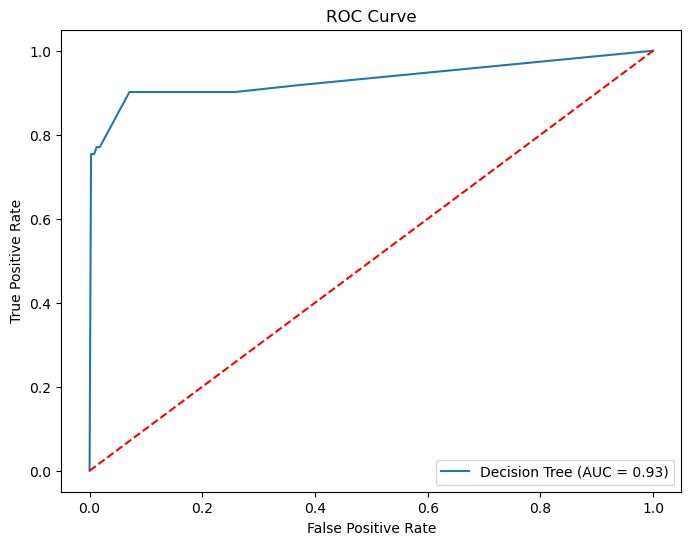

In [ ]:
decision_tree = DecisionTreeClassifier(**best_params_dt)
decision_tree.fit(X_train, y_train)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

***
**Insight**
***
*  ROC score dari model Decision Tree cukup baik, yaitu 0,87.
*  Berdasarkan ROC curve di atas, model dengan Decision Tree memberikan performa yang baik dengan nilai AUC 0.93, yang mana kurvanya mendekati ujung kiri atas atau mendekati 1,0.

## **5.4 Feature Importance**

Mencari feature importance dari model Decision Tree dengan membandingkan nilai feature terhadap terget variabel. Kemudian diurutkan dari tingkat importance tertinggi hingga terendah (descending) dan divisualisasikan dengan bar plot.

                       feature  importance
5                        Power    0.295078
2       Rotational speed [rpm]    0.218580
3                  Torque [Nm]    0.116923
4              Tool wear [min]    0.110532
7       Temperature power [°C]    0.104626
6  Temperature difference [°C]    0.088260
8                         Type    0.038779
1     Process temperature [°C]    0.014227
0         Air temperature [°C]    0.012995


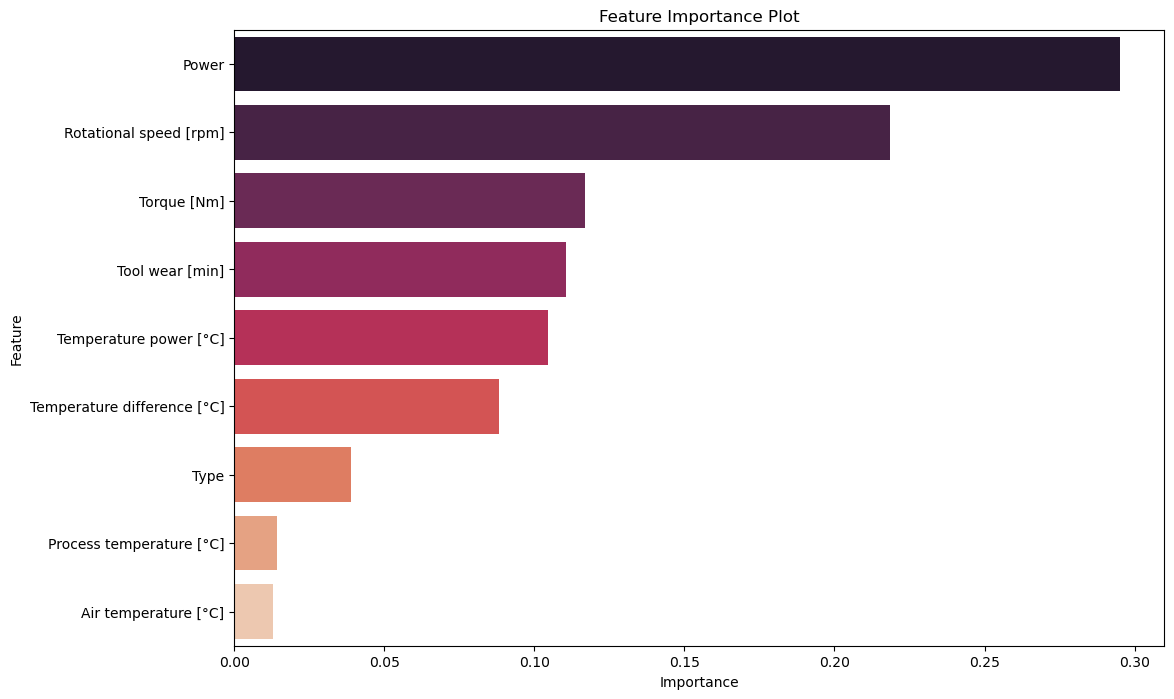

In [ ]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance':dt.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importance)
plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='rocket')
plt.title("Feature Importance Plot")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()